# Ripley L Analysis Workflow
# 
This notebook runs the complete Ripley L analysis workflow using SPAC templates.
# 
**Location**: This notebook should be in `SCSAWORKFLOW/examples/spac_ripley_analysis/`

## Step 1: Setup Paths and Imports

In [1]:
# %%
import sys
import os
import json
from pathlib import Path

In [2]:
# Get the current notebook directory
notebook_dir = Path.cwd()
print(f"Current directory: {notebook_dir}")

# Navigate to the SCSAWORKFLOW root to import spac modules
# Go up from examples/spac_ripley_analysis to SCSAWORKFLOW
project_root = notebook_dir.parent.parent
sys.path.insert(0, str(project_root))

Current directory: /Users/liuf9/Projects/SCSAWorkflow/examples/spac_ripley_analysis


In [3]:
# Add the local src directory for any local imports
local_src = notebook_dir / "src"
if local_src.exists():
    sys.path.insert(0, str(local_src))

print(f"Project root: {project_root}")
print(f"Local src: {local_src}")

Project root: /Users/liuf9/Projects/SCSAWorkflow
Local src: /Users/liuf9/Projects/SCSAWorkflow/examples/spac_ripley_analysis/src


In [4]:
# Import from the spac package
from src.spac.templates.ripley_l_template import run_from_json as run_ripley
from src.spac.templates.visualize_ripley_template import run_from_json as run_viz

print("Successfully imported SPAC templates!")

Successfully imported SPAC templates!


# Step 2: Check Input Data



In [5]:
# %%
# Check if data directory exists and list files
data_dir = notebook_dir / "data"
if data_dir.exists():
    print("Files in data directory:")
    for file in data_dir.iterdir():
        print(f"  - {file.name}")
else:
    print("Data directory not found. Creating it...")
    data_dir.mkdir(exist_ok=True)


Files in data directory:
  - transform_output.pickle
  - sample_spatial_data.h5ad


In [6]:
# Define input file
input_file = data_dir / "sample_spatial_data.h5ad"
if input_file.exists():
    print(f"\n✓ Input file found: {input_file}")
else:
    print(f"\n✗ Input file not found: {input_file}")
    print("  Please place your transform_output.h5ad file in the data directory")


✓ Input file found: /Users/liuf9/Projects/SCSAWorkflow/examples/spac_ripley_analysis/data/sample_spatial_data.h5ad


## Step 3: Create Ripley L Parameters

In [7]:
# %%
# Create ripley_l_params.json in configs directory
configs_dir = notebook_dir / "configs"

ripley_params = {
    "Upstream_Analysis": str(data_dir / "sample_spatial_data.h5ad"),
    "Radii": [0, 50, 100, 150, 200, 250, 300],
    "Annotation": "renamed_phenotypes",
    "Center_Phenotype": "B cells",
    "Neighbor_Phenotype": "CD8 T cells",
    "Stratify_By": "None",
    "Number_of_Simulations": 100,
    "Area": "None",
    "Seed": 42,
    "Spatial_Key": "spatial",
    "Edge_Correction": True,
    "Output_File": str(notebook_dir / "outputs" / "ripley_output.h5ad")
}

In [8]:
# Save to configs directory
ripley_config_path = configs_dir / "ripley_l_config.json"
with open(ripley_config_path, "w") as f:
    json.dump(ripley_params, f, indent=2)

print(f"Created Ripley L config at: {ripley_config_path}")
print("\nParameters:")
print(json.dumps(ripley_params, indent=2))

Created Ripley L config at: /Users/liuf9/Projects/SCSAWorkflow/examples/spac_ripley_analysis/configs/ripley_l_config.json

Parameters:
{
  "Upstream_Analysis": "/Users/liuf9/Projects/SCSAWorkflow/examples/spac_ripley_analysis/data/sample_spatial_data.h5ad",
  "Radii": [
    0,
    50,
    100,
    150,
    200,
    250,
    300
  ],
  "Annotation": "renamed_phenotypes",
  "Center_Phenotype": "B cells",
  "Neighbor_Phenotype": "CD8 T cells",
  "Stratify_By": "None",
  "Number_of_Simulations": 100,
  "Area": "None",
  "Seed": 42,
  "Spatial_Key": "spatial",
  "Edge_Correction": true,
  "Output_File": "/Users/liuf9/Projects/SCSAWorkflow/examples/spac_ripley_analysis/outputs/ripley_output.h5ad"
}


## Step 4: Run Ripley L Analysis

In [9]:
# %%
# Make sure outputs directory exists
outputs_dir = notebook_dir / "outputs"
outputs_dir.mkdir(exist_ok=True)

# Run the analysis
print("Running Ripley L analysis...")
try:
    ripley_results = run_ripley(ripley_config_path)
    print("Analysis complete!")
    print(f"Results saved to: {ripley_results}")
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Make sure transform_output.h5ad is in the data directory")
except Exception as e:
    print(f"Error running analysis: {e}")

Running Ripley L analysis...
Processing region:"all".
Cells in region:"4825"
Error running analysis: Object of type DataFrame is not JSON serializable


## Step 5: Create Visualization Parameters

In [10]:
# %%
# Create visualization parameters
viz_params = {
    "Upstream_Analysis": str(outputs_dir / "ripley_output.h5ad"),
    "Center_Phenotype": "B cells",
    "Neighbor_Phenotype": "CD8 T cells",
    "Plot_Specific_Regions": False,
    "Regions_Label_s_": [],
    "Plot_Simulations": True,
    "Output_File": str(outputs_dir / "ripley_plots.csv")
}

# Save to configs directory
viz_config_path = configs_dir / "visualize_ripley_config.json"
with open(viz_config_path, "w") as f:
    json.dump(viz_params, f, indent=2)

print(f"Created visualization config at: {viz_config_path}")
print("\nParameters:")
print(json.dumps(viz_params, indent=2))

Created visualization config at: /Users/liuf9/Projects/SCSAWorkflow/examples/spac_ripley_analysis/configs/visualize_ripley_config.json

Parameters:
{
  "Upstream_Analysis": "/Users/liuf9/Projects/SCSAWorkflow/examples/spac_ripley_analysis/outputs/ripley_output.h5ad",
  "Center_Phenotype": "B cells",
  "Neighbor_Phenotype": "CD8 T cells",
  "Plot_Specific_Regions": false,
  "Regions_Label_s_": [],
  "Plot_Simulations": true,
  "Output_File": "/Users/liuf9/Projects/SCSAWorkflow/examples/spac_ripley_analysis/outputs/ripley_plots.csv"
}


In [11]:
# %%
# Debug the visualization function
print("Debugging visualization function...")
print(f"Function type: {type(run_viz)}")
print(f"Config path: {viz_config_path}")
print(f"Config exists: {viz_config_path.exists()}")

# Test with a simple call to see what it returns
try:
    # Load the config to verify it's valid JSON
    with open(viz_config_path, 'r') as f:
        config_data = json.load(f)
    print("Config loaded successfully:")
    print(json.dumps(config_data, indent=2))
except Exception as e:
    print(f"Config loading error: {e}")

Debugging visualization function...
Function type: <class 'function'>
Config path: /Users/liuf9/Projects/SCSAWorkflow/examples/spac_ripley_analysis/configs/visualize_ripley_config.json
Config exists: True
Config loaded successfully:
{
  "Upstream_Analysis": "/Users/liuf9/Projects/SCSAWorkflow/examples/spac_ripley_analysis/outputs/ripley_output.h5ad",
  "Center_Phenotype": "B cells",
  "Neighbor_Phenotype": "CD8 T cells",
  "Plot_Specific_Regions": false,
  "Regions_Label_s_": [],
  "Plot_Simulations": true,
  "Output_File": "/Users/liuf9/Projects/SCSAWorkflow/examples/spac_ripley_analysis/outputs/ripley_plots.csv"
}


## Step 6: Run Visualization

Creating visualization...
Error creating visualization: string indices must be integers
Type of viz_results: undefined
Full traceback:


Traceback (most recent call last):
  File "/var/folders/fd/krg499q52bq1bjk316swjcsxspb1wj/T/ipykernel_59609/50157902.py", line 5, in <module>
    viz_results = run_viz(viz_config_path)
  File "/Users/liuf9/Projects/SCSAWorkflow/src/spac/templates/visualize_ripley_template.py", line 70, in run_from_json
    fig, plots_df = plot_ripley_l(
  File "/Users/liuf9/Projects/SCSAWorkflow/src/spac/visualization.py", line 2931, in plot_ripley_l
    n_center = row['ripley_l']['n_center']
TypeError: string indices must be integers


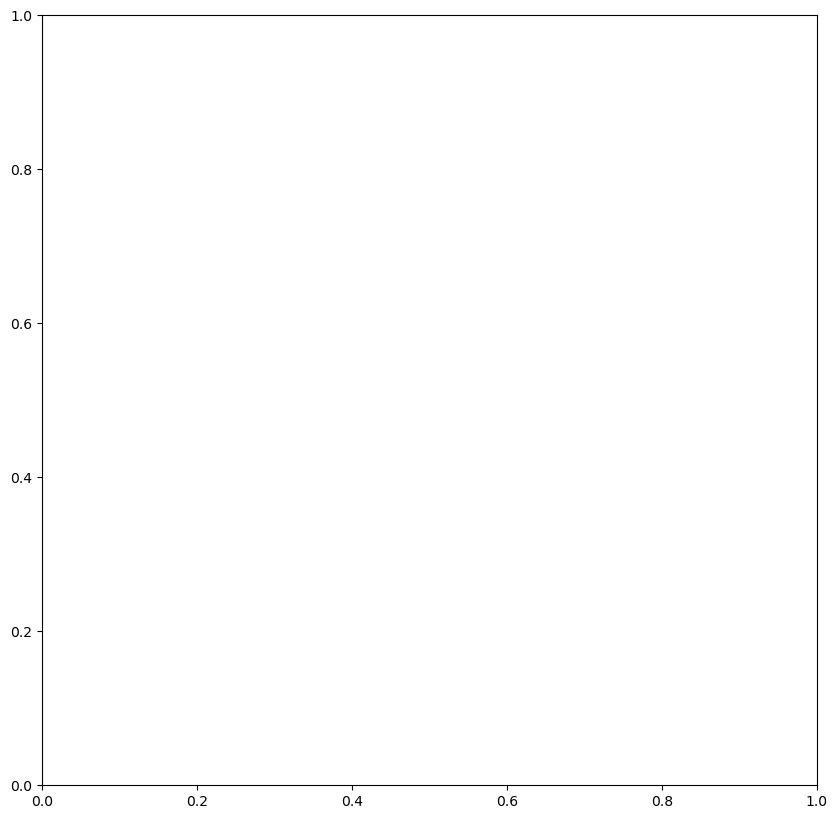

In [12]:
# %%
# Run visualization
print("Creating visualization...")
try:
    viz_results = run_viz(viz_config_path)
    print("Visualization complete!")
    print(f"Results saved to: {viz_results}")

    # Check if viz_results is a dictionary or string
    if isinstance(viz_results, dict):
        print(f"Results saved to: {viz_results}")
        # Access specific files if needed
        for filename, filepath in viz_results.items():
            print(f"  {filename}: {filepath}")
    else:
        # If it's a string, just print it
        print(f"Results: {viz_results}")
    
    # The plot should display automatically
    # CSV data is saved to outputs/ripley_plots.csv
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Make sure the Ripley L analysis completed successfully first")
except Exception as e:
    print(f"Error creating visualization: {e}")
    print(f"Type of viz_results: {type(viz_results) if 'viz_results' in locals() else 'undefined'}")
    # Add debugging information
    import traceback
    print("Full traceback:")
    traceback.print_exc()



## Step 7: Check Output Files

In [13]:
# %%
# List all output files
print("Output files created:")
if outputs_dir.exists():
    for file in outputs_dir.iterdir():
        print(f"  - {file.name} ({file.stat().st_size} bytes)")
        
# Load and display the CSV data
import pandas as pd

csv_path = outputs_dir / "ripley_plots.csv"
if csv_path.exists():
    df = pd.read_csv(csv_path)
    print(f"\nRipley L data ({len(df)} rows):")
    print(df.head(10))

Output files created:
  - .DS_Store (6148 bytes)
  - ripley_output.h5ad (4159484 bytes)
